In [3]:
from collections import defaultdict
import itertools
import string
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import sys
sys.path.append('..')
from text_recognizer.datasets.emnist_line_dataset import EmnistLinesDataset, construct_image_from_string, get_samples_by_char
from text_recognizer.datasets.sentence_generator import SentenceGenerator

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### DATASET

In [4]:
dataset = EmnistLinesDataset()
dataset.load_or_generate_data()
print(dataset)

EMNISTLinesDataset generating data...
EMNISTLinesDataset generating data...
EmnistLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Max_length: 34
Max overlap: 0.33
Num classes: 80
Input shape: (28, 952)
Train: (10000, 28, 952) (10000, 34, 80)
Test: (1000, 28, 952) (1000, 34, 80)



In [5]:
print('Mapping', dataset.mapping)

Mapping {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}


In [8]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapping[i] for i in np.argmax(y, axis=-1)])

convert_y_label_to_string(dataset.y_train[0])

'the fire for washing______________'

the fire for washing______________
go much further than______________
a complete________________________
upper_____________________________
ancestry extending________________
high ground_______________________
voyage The sickness was___________
I said Its a kindness to__________
analyzing the results_____________


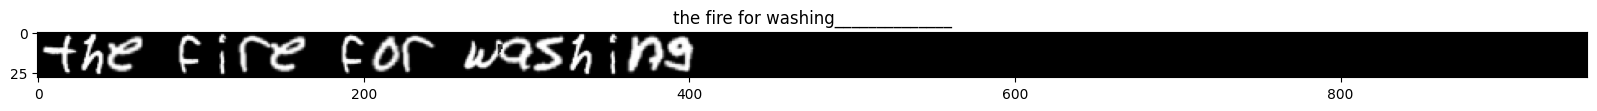

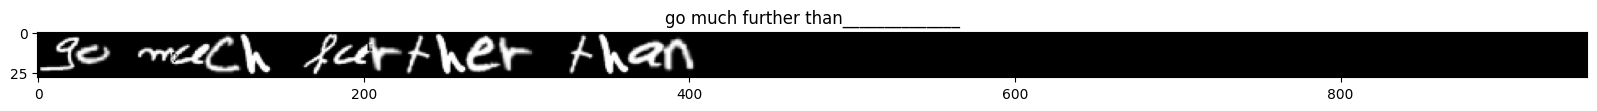

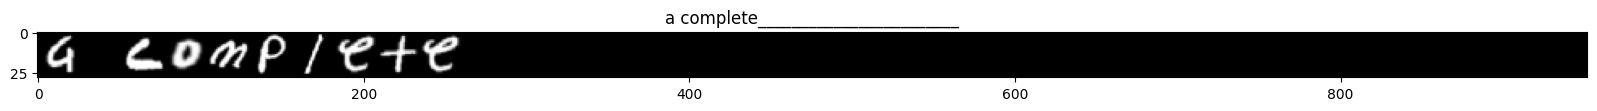

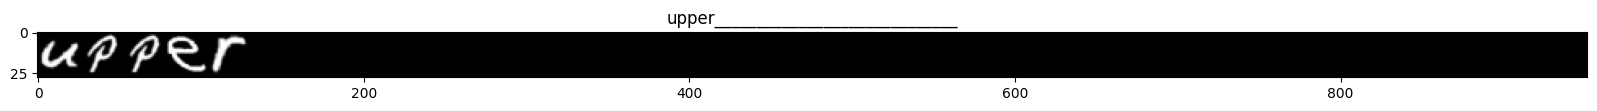

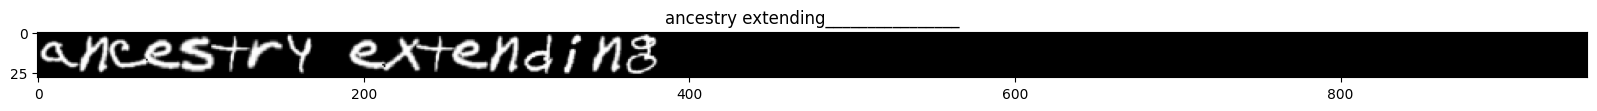

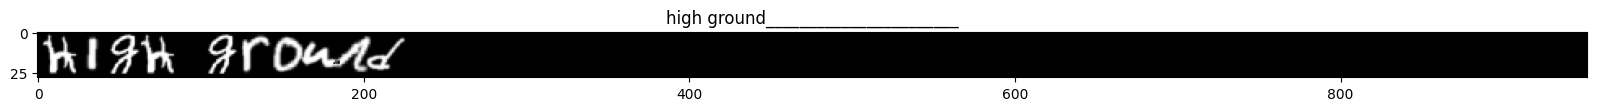

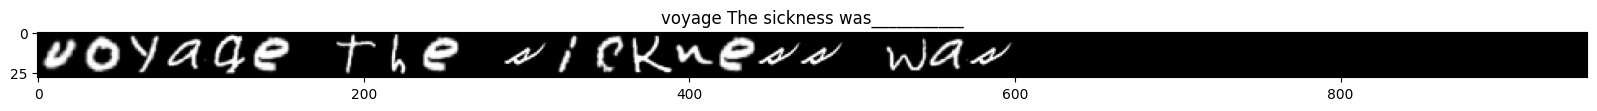

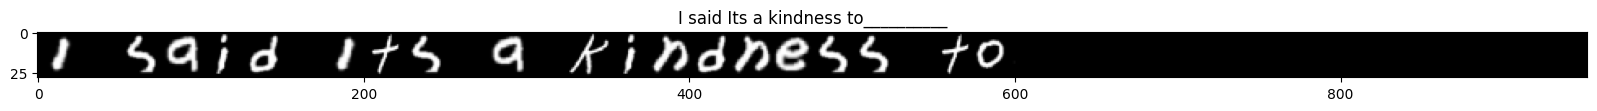

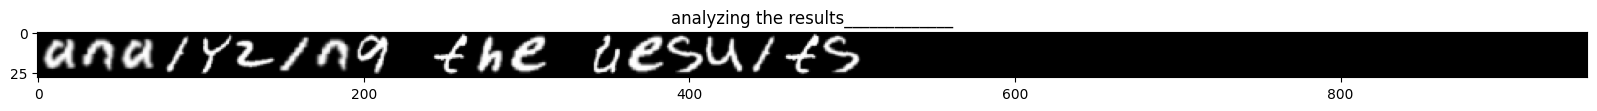

In [10]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20,20))
    sentence= convert_y_label_to_string(dataset.y_train[i])
    print(sentence)
    plt.title(sentence)
    plt.imshow(dataset.x_train[i], cmap='gray')